## Loading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [6]:
airbnb=pd.read_csv("AB_NYC_2019.csv")

#Remove unsignificant data
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
airbnb.fillna({'reviews_per_month':0}, inplace=True)
airbnb.head(3)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


## Basic statistics of dataset

In [14]:
print('Number of records:',len(airbnb))

Number of records: 48895


In [12]:
print('Null data in the dataset:')
print(airbnb.isnull().sum())

Null data in the dataset:
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [16]:
print('Names of districts:')
print(airbnb.neighbourhood_group.unique())

Names of districts:
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [17]:
print('Types of rooms:')
print(airbnb.room_type.unique())

Types of rooms:
['Private room' 'Entire home/apt' 'Shared room']


## Initial Analysis

### Mean and Median price in different districts

In [18]:
airbnb_group = airbnb.groupby('neighbourhood_group')
airbnb_group['price'].agg(['mean', 'median'])

,mean,median
neighbourhood_group,,
Bronx,87.496792,65.0
Brooklyn,124.383207,90.0
Manhattan,196.875814,150.0
Queens,99.517649,75.0
Staten Island,114.812332,75.0


### Room type distribution

In [19]:
airbnb.groupby('room_type').size()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
dtype: int64

### Corelation between Price and Reviews

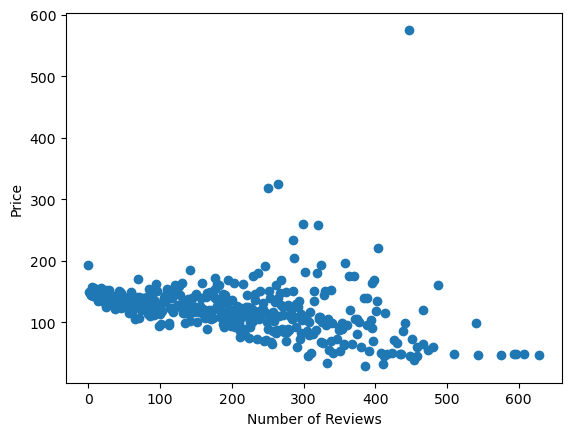

In [20]:
grouped_data = airbnb.groupby('number_of_reviews')['price'].mean().reset_index()

plt.scatter(grouped_data['number_of_reviews'], grouped_data['price'])
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

In [22]:
import statsmodels.api as sm

X = grouped_data[['price']]
y = grouped_data['number_of_reviews']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      number_of_reviews   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     50.29
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           6.23e-12
Time:                        14:04:12   Log-Likelihood:                -2462.3
No. Observations:                 394   AIC:                             4929.
Df Residuals:                     392   BIC:                             4936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        330.9872     18.540     17.853      0.0

From both the scatter plot and the summary of regression, we can observe a negative correlation between number of reviews and the price.